# Matrix visualisations

In [1]:
%run ../notebook_preamble_Transitions.ipy

import mapping_career_causeways.plotting_utils as plot_utils

import umap
import matplotlib
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

In [2]:
# Filtering matrices
filter_matrices = pickle.load(open(data_folder + 'interim/transitions/filter_matrices_Report_occupations.pickle','rb'))
for key in filter_matrices.keys():
    print(key)

F_viable
F_min_viable
F_highly_viable
F_desirable
F_jobzone
F_earnings
F_not_high_risk
F_safer
F_strictly_safe
F_not_self
F_safe_desirable
F_strictly_safe_desirable
origin_ids
destination_ids


# 1. Large transition matrix

In [3]:
W_viz = sim.W_combined[data.report_occ_ids,:].copy()
W_viz = W_viz[:, data.report_occ_ids]
F = filter_matrices['F_jobzone']

In [4]:
new_ordering_lvl1 = [10, 13, 6, 5, 1, 2, 9, 11, 4, 0, 3, 8, 7, 12]
clust_to_order = dict(zip(new_ordering_lvl1, range(len(new_ordering_lvl1))))
df_occ = data.occ_report.copy()
df_occ['level_1_new'] = df_occ['level_1'].apply(lambda x: clust_to_order[x])
df_occ['rows'] = list(range(len(df_occ)))
new_order = df_occ.sort_values(['level_1_new', 'level_2', 'isco_level_4']).rows.to_list()

df_ordered = df_occ.iloc[new_order]
n = len(df_ordered)
x = []
level = 'level_1_new'
for j in range(len(df_ordered[level].unique())):
    x.append(np.where(df_ordered[level]==j)[0][0])
x.append(n)

In [5]:
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]

F_ord = F[new_order, :]
F_ord = F_ord[:, new_order]

W_thresh = W_ord.copy()
W_thresh[W_ord <= 0.3] = 0
W_thresh[(W_ord <= 0.4) & (W_ord > 0.3)] = 1
W_thresh[W_ord > 0.4] = 2

W_thresh[F_ord==False] = 0

In [6]:
data.clusters_level_1.loc[new_ordering_lvl1].manual_labels.to_list()

['healthcare workers',
 'social workers',
 'education workers',
 'arts & media workers',
 'business & administration workers',
 'sales & services workers',
 'logistics workers',
 'ict workers',
 'engineers & researchers',
 'technicians, construction, transport & security workers',
 'manufacturing workers',
 'food & tobacco production workers',
 'textile, clothing, leather & footwear manufacturing workers',
 'animal care & husbandry workers']

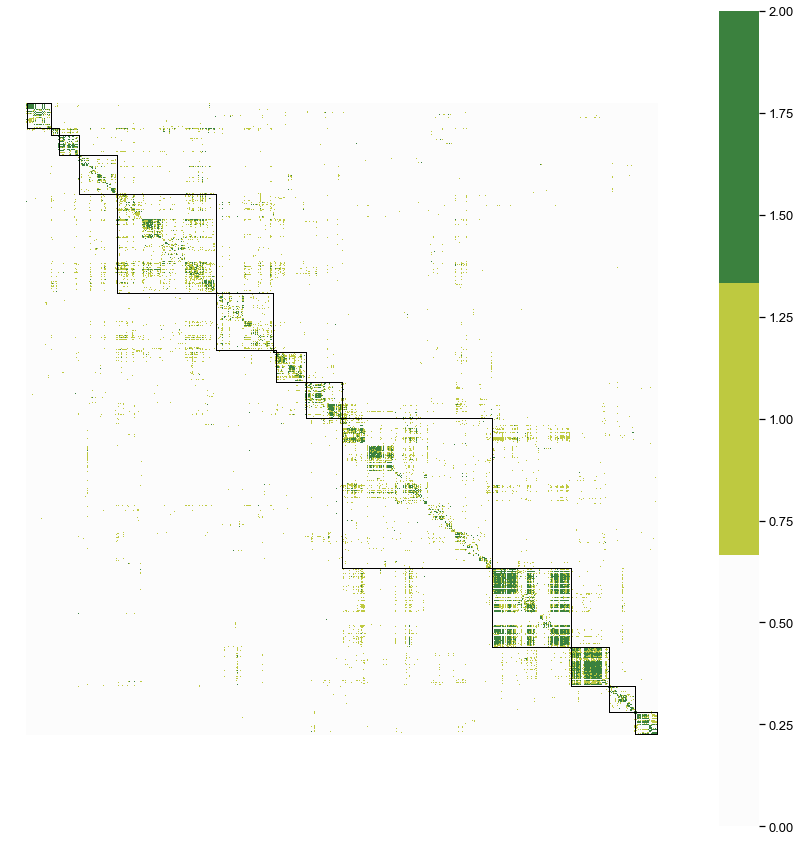

In [7]:
plt.figure(figsize=(15,15))
cmap = matplotlib.colors.ListedColormap([[0.99, 0.99, 0.99], '#bec940', '#3b813e'])

sns.heatmap(W_thresh, annot=False, cmap=cmap, square=1, xticklabels=False, yticklabels=False)

for r, row in enumerate(x[0:len(x)-2]):
    plt.plot([x[r], x[r+2]], [x[r+1], x[r+1]], color='k', linewidth=1) 
    plt.plot([x[r+1], x[r+1]], [x[r], x[r+2]], color='k', linewidth=1)

plt.plot([0, x[1]], [0, 0], color='k', linewidth=1)
plt.plot([0, 0], [0, x[1]], color='k', linewidth=1)
plt.plot([x[-2], n], [n, n], color='k', linewidth=1)
plt.plot([n, n], [x[-2], n], color='k', linewidth=1)

plt.xlim([-50,n+50])
plt.ylim([n+50,-50])
plot_utils.export_figure('fig_44', svg=False)
plt.show()

# Similarity matrices

In [8]:
selected_cmap = 'Greens'
top_occ = data.report_occ_ids

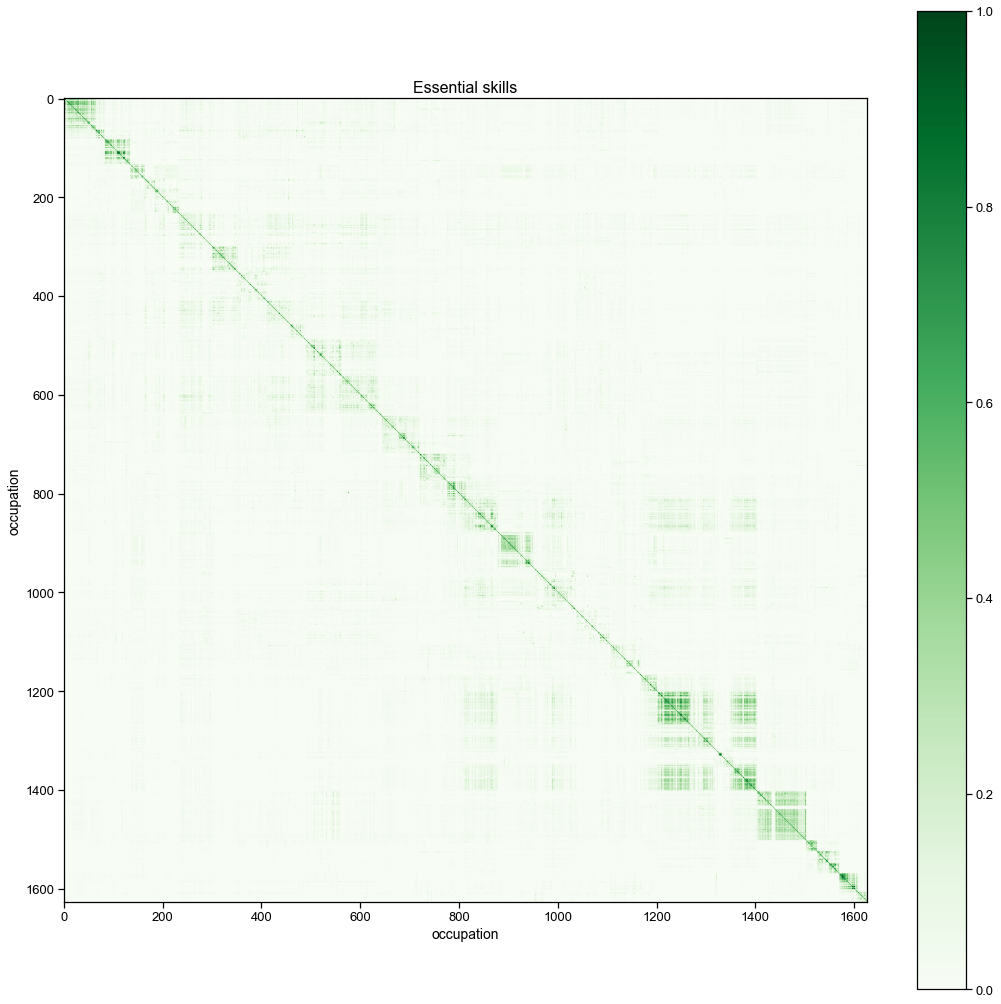

In [9]:
W_viz = sim.W_essential[top_occ,:].copy()
W_viz = W_viz[:, top_occ]
W_viz.shape
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]



plt.figure(figsize=(18,18))
plt.imshow(W_ord,
           cmap = selected_cmap,
           vmin=0, vmax=1);
plt.colorbar()
plt.title('Essential skills', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('occupation', fontsize=14)
plot_utils.export_figure('fig_53_essential', svg=False)
plt.show()

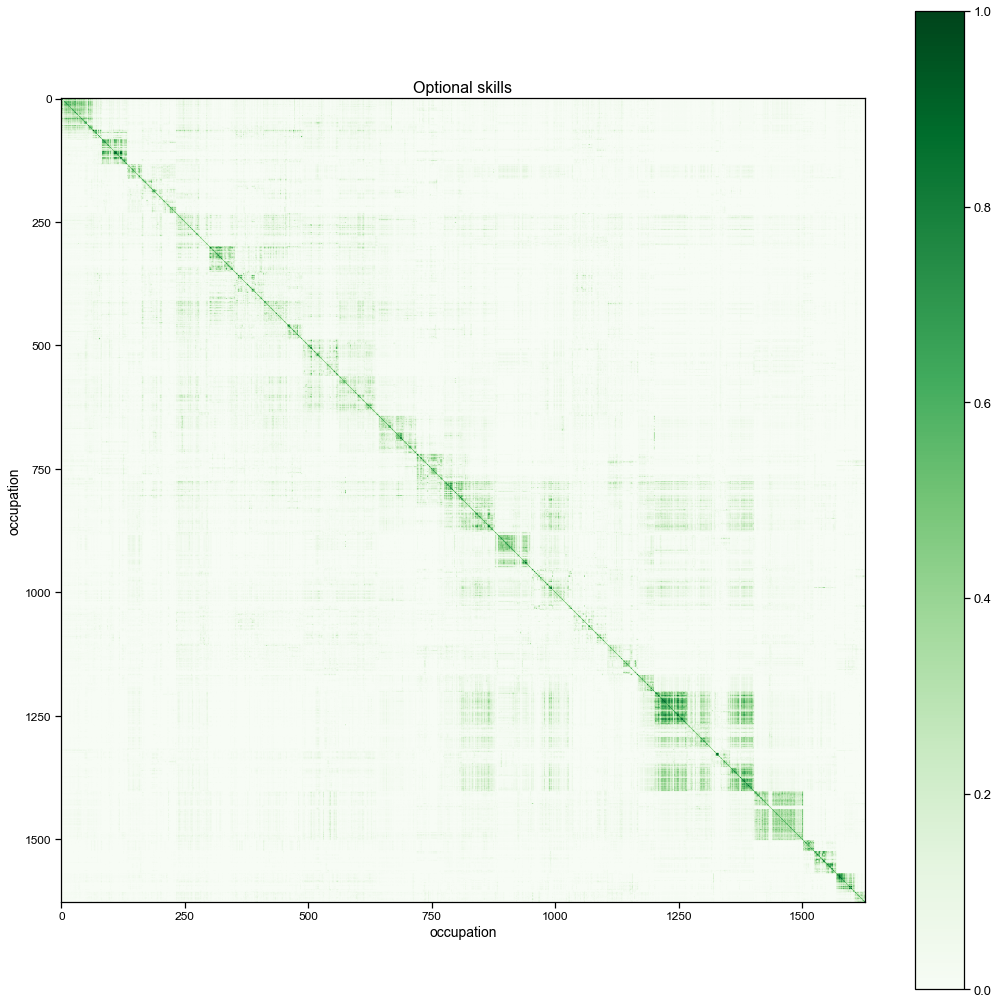

In [10]:
W_viz = sim.W_all_to_essential[top_occ,:].copy()
W_viz = W_viz[:, top_occ]
W_viz.shape
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]

plt.figure(figsize=(18,18))
plt.imshow(W_ord,
           cmap = selected_cmap,
           vmin=0, vmax=1);
plt.colorbar()
plt.title('Optional skills', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('occupation', fontsize=14)

plt.xticks(list(range(0,1601,250)), fontsize=12)
plt.yticks(list(range(0,1601,250)), fontsize=12)
plot_utils.export_figure('fig_53_optional', svg=False)

plt.show()

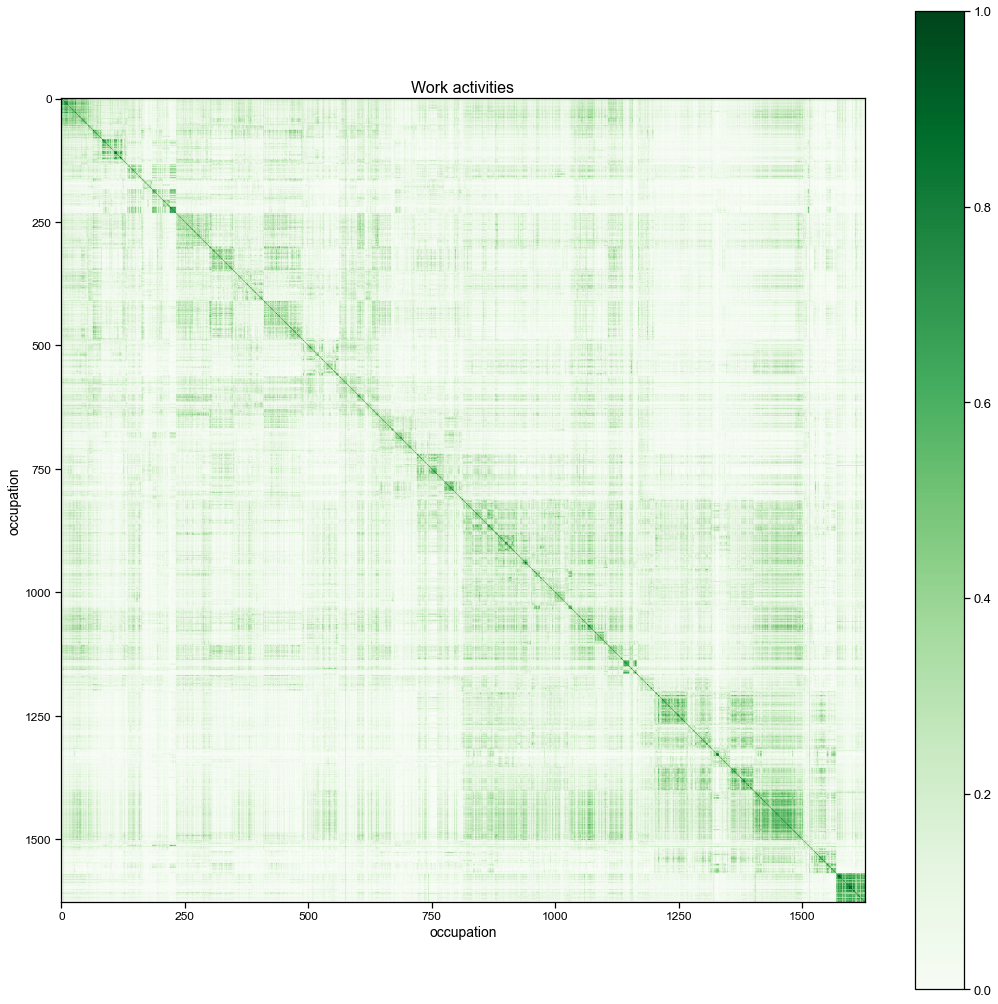

In [11]:
W_viz = sim.W_activities[top_occ,:].copy()
W_viz = W_viz[:, top_occ]
W_viz.shape
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]

plt.figure(figsize=(18,18))
plt.imshow(W_ord,
           cmap = selected_cmap,           
           vmin=0, vmax=1);
plt.colorbar()
plt.title('Work activities', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('occupation', fontsize=14)

plt.xticks(list(range(0,1601,250)), fontsize=12)
plt.yticks(list(range(0,1601,250)), fontsize=12)
plot_utils.export_figure('fig_53_work_activities', svg=False)

plt.show()

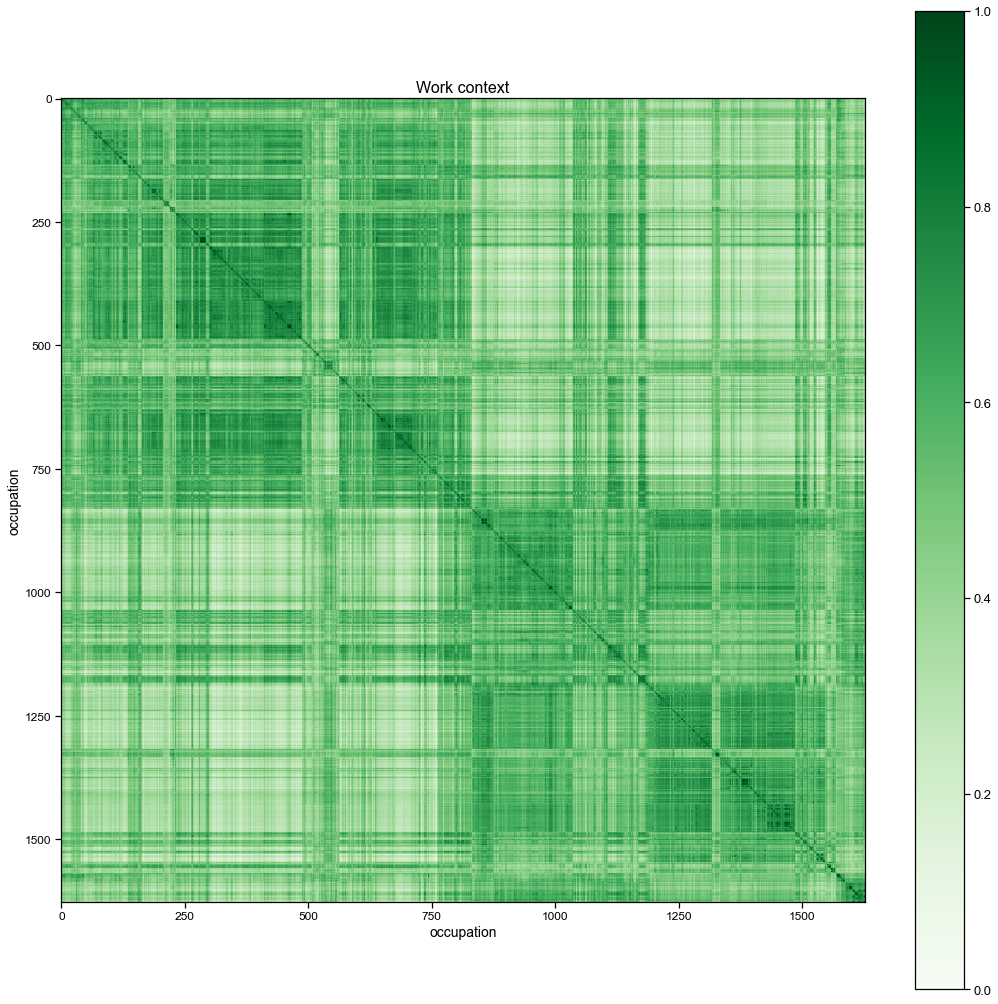

In [12]:
W_viz = sim.W_work_context[top_occ,:].copy()
W_viz = W_viz[:, top_occ]
W_viz.shape
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]

plt.figure(figsize=(18,18))
plt.imshow(W_ord, 
           cmap = selected_cmap,
           vmin=0, vmax=1);
plt.colorbar()
plt.title('Work context', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('occupation', fontsize=14)

plt.xticks(list(range(0,1601,250)), fontsize=12)
plt.yticks(list(range(0,1601,250)), fontsize=12)
plot_utils.export_figure('fig_53_work_context', svg=False)
plt.show()

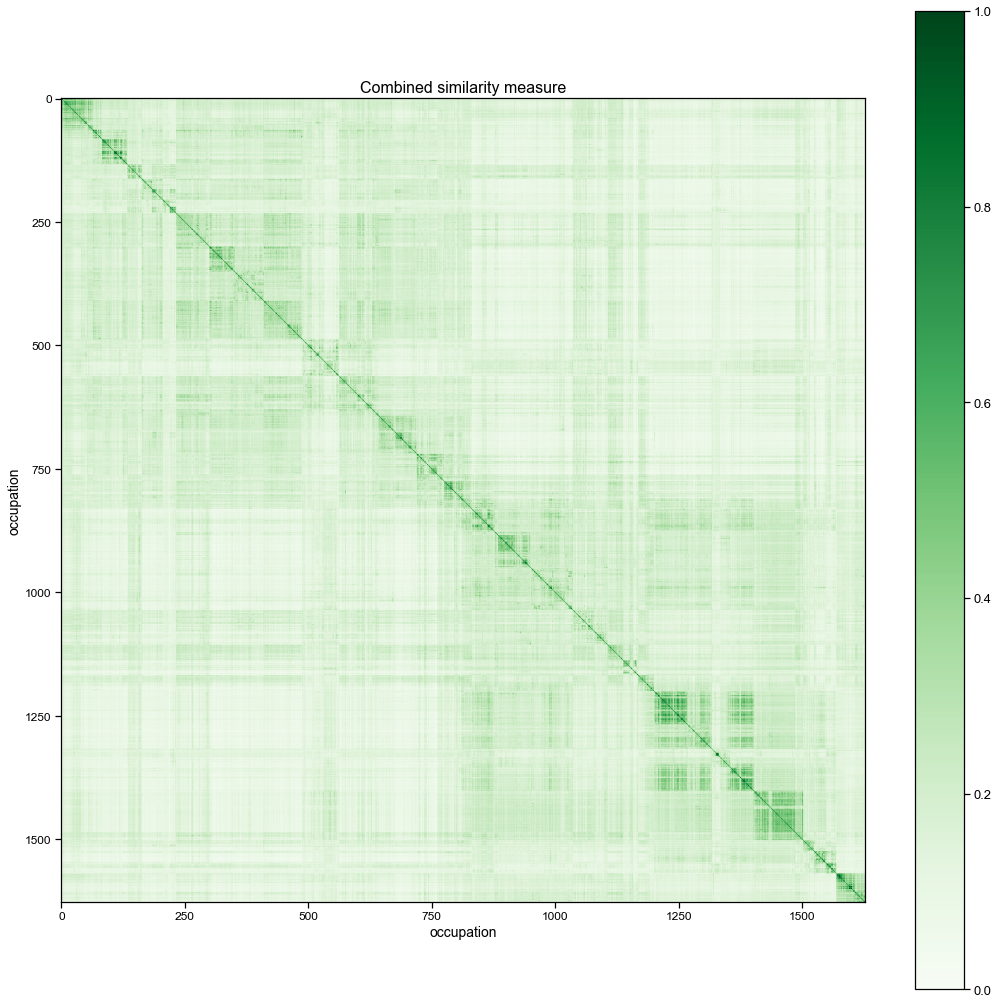

In [13]:
W_viz = sim.W_combined[top_occ,:].copy()
W_viz = W_viz[:, top_occ]
W_viz.shape
W_ord = W_viz[new_order, :]
W_ord = W_ord[:, new_order]

plt.figure(figsize=(18,18))
plt.imshow(W_ord,
           cmap = selected_cmap,
           vmin=0, vmax=1.0);
plt.colorbar()
plt.title('Combined similarity measure', fontsize=16)
plt.xlabel('occupation', fontsize=14)
plt.ylabel('occupation', fontsize=14)

plt.xticks(list(range(0,1601,250)), fontsize=12)
plt.yticks(list(range(0,1601,250)), fontsize=12)
plot_utils.export_figure('fig_53_combined', svg=False)
plt.show()